# <center>DAT407 Assignment 1 – Group 19</center>
### <center>Avinash Shukla - 20 hours</center>
### <center>Josef Rasheed - 20 hours</center>
### <center>March 27, 2023</center>

In [1]:
# We import the necessary libraries under shorter aliases.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##  Data cleaning

In this section we will inspect the data and clean it from any entries that are not useful for us. This will make it easier to avoid mistakes in the future. To avoid wasting time we will only clean data from the year 2020 since that is the latest data our datasets hold.

### GDP per capita data [1]

In [2]:
# Reads from the gdp-pc csv file and creating a dataframe from the data.
gdp_pc_df = pd.read_csv("datasets/gdp-pc.csv")

# Prints first and last five rows to get a quick overview of the data
gdp_pc_df

,Entity,Code,Year,GDP per capita
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810059
2,Afghanistan,AFG,2004,1200.277954
3,Afghanistan,AFG,2005,1286.793701
4,Afghanistan,AFG,2006,1315.789062
...,...,...,...,...
6161,Zimbabwe,ZWE,2016,3678.217041
6162,Zimbabwe,ZWE,2017,3795.642334
6163,Zimbabwe,ZWE,2018,3923.030518
6164,Zimbabwe,ZWE,2019,3630.033936


In [3]:
# Get gdp pc data from 2020
gdp_pc_2020 = gdp_pc_df[gdp_pc_df.Year == 2020]

gdp_pc_2020

,Entity,Code,Year,GDP per capita
18,Afghanistan,AFG,2020,1970.560181
49,Albania,ALB,2020,13191.952148
80,Algeria,DZA,2020,10735.382812
111,Angola,AGO,2020,6110.274414
142,Antigua and Barbuda,ATG,2020,17293.302734
...,...,...,...,...
6041,Vanuatu,VUT,2020,2854.292480
6072,Vietnam,VNM,2020,8200.332031
6103,World,OWID_WRL,2020,16185.165039
6134,Zambia,ZMB,2020,3277.816406


In [4]:
isna_list = gdp_pc_2020[gdp_pc_2020.isna().any(axis=1)]

print(isna_list.shape)
isna_list

(14, 4)


,Entity,Code,Year,GDP per capita
1559,East Asia and Pacific,NaN,2020,17548.126953
1802,Europe and Central Asia,NaN,2020,33480.156250
1833,European Union,NaN,2020,41713.882812
2329,High income,NaN,2020,47952.492188
2977,Latin America and Caribbean,NaN,2020,14824.330078
3165,Low and middle income,NaN,2020,10273.044922
3196,Low income,NaN,2020,1988.428223
3227,Lower middle income,NaN,2020,6764.930664
3656,Middle East and North Africa,NaN,2020,15210.993164
3687,Middle income,NaN,2020,11224.483398


We are only interested in countries, and we see above that all rows containing null are not countries, thus they can be removed.

In [5]:
# Remove all null rows
gdp_pc_2020 = gdp_pc_2020.dropna()
print(gdp_pc_2020.shape)
print(gdp_pc_2020.to_markdown())

(191, 4)
|      | Entity                           | Code     |   Year |   GDP per capita |
|-----:|:---------------------------------|:---------|-------:|-----------------:|
|   18 | Afghanistan                      | AFG      |   2020 |         1970.56  |
|   49 | Albania                          | ALB      |   2020 |        13192     |
|   80 | Algeria                          | DZA      |   2020 |        10735.4   |
|  111 | Angola                           | AGO      |   2020 |         6110.27  |
|  142 | Antigua and Barbuda              | ATG      |   2020 |        17293.3   |
|  173 | Argentina                        | ARG      |   2020 |        19690.7   |
|  204 | Armenia                          | ARM      |   2020 |        12619.9   |
|  263 | Australia                        | AUS      |   2020 |        48678.7   |
|  294 | Austria                          | AUT      |   2020 |        51857.7   |
|  325 | Azerbaijan                       | AZE      |   2020 |        13726.8

Upon further inspection we also identify the anomalous entries "Kosovo" with code "OWID_KOS" and "World" with code "OWID_WRL".
We are not completely sure about what these entries mean but assume that the "World" entry refers to the world GDP pc, which is irrelevant for us. And that the "Kosovo" entry has something to do with that Kosovo isn't reconised as a country by some countries. Either way we will delete these entries to avoid any problems.

In [6]:
# Remove "Kosovo" and "World"
gdp_pc_clean = gdp_pc_2020.loc[(gdp_pc_2020['Entity'] != 'Kosovo') & (gdp_pc_2020['Entity'] != 'World')]

print(gdp_pc_clean.shape)

(189, 4)


### GDP data [2]

In [7]:
# Reads from the gdp csv file and creating a dataframe from the data.
gdp_df = pd.read_csv("datasets/gdp.csv")

gdp_df

,Entity,Code,Year,GDP
0,Afghanistan,AFG,2002,7228792320
1,Afghanistan,AFG,2003,7867259392
2,Afghanistan,AFG,2004,7978511360
3,Afghanistan,AFG,2005,8874475520
4,Afghanistan,AFG,2006,9349916672
...,...,...,...,...
10452,Zimbabwe,ZWE,2016,20114016256
10453,Zimbabwe,ZWE,2017,21061283840
10454,Zimbabwe,ZWE,2018,22077325312
10455,Zimbabwe,ZWE,2019,20720840704


In [8]:
# Get gdp data from 2020
gdp_2020 = gdp_df[gdp_df.Year == 2020]
gdp_2020

,Entity,Code,Year,GDP
18,Afghanistan,AFG,2020,20621946880
59,Albania,ALB,2020,12457862144
120,Algeria,DZA,2020,168144142336
139,American Samoa,ASM,2020,653477888
190,Andorra,AND,2020,2649303808
...,...,...,...,...
10207,Vanuatu,VUT,2020,810535808
10244,Vietnam,VNM,2020,258508668928
10305,World,OWID_WRL,2020,81830090899456
10395,Zambia,ZMB,2020,23418945536


In [9]:
isna_list = gdp_2020[gdp_2020.isna().any(axis=1)]

print(isna_list.shape)
isna_list

(14, 4)


,Entity,Code,Year,GDP
2667,East Asia and Pacific,NaN,2020,26267552317440
3074,Europe and Central Asia,NaN,2020,21122173108224
3125,European Union,NaN,2020,13890496757760
4097,High income,NaN,2020,49843141607424
5163,Latin America and Caribbean,NaN,2020,5220250157056
5414,Low and middle income,NaN,2020,31704873959424
5454,Low income,NaN,2020,479579078656
5515,Lower middle income,NaN,2020,7530226909184
6216,Middle East and North Africa,NaN,2020,3243739447296
6277,Middle income,NaN,2020,31226517782528


None of the above are countries so we can get rid of them.

In [10]:
# Remove all null rows
gdp_2020 = gdp_2020.dropna()
print(gdp_2020.shape)
print(gdp_2020.to_markdown())

(196, 4)
|       | Entity                           | Code     |   Year |            GDP |
|------:|:---------------------------------|:---------|-------:|---------------:|
|    18 | Afghanistan                      | AFG      |   2020 |    20621946880 |
|    59 | Albania                          | ALB      |   2020 |    12457862144 |
|   120 | Algeria                          | DZA      |   2020 |   168144142336 |
|   139 | American Samoa                   | ASM      |   2020 |      653477888 |
|   190 | Andorra                          | AND      |   2020 |     2649303808 |
|   231 | Angola                           | AGO      |   2020 |   104128684032 |
|   275 | Antigua and Barbuda              | ATG      |   2020 |     1301036672 |
|   336 | Argentina                        | ARG      |   2020 |   514772402176 |
|   367 | Armenia                          | ARM      |   2020 |    11915300864 |
|   460 | Australia                        | AUS      |   2020 |  1490967855104 |
|   521

Just like the other data, we will remove "Kosovo" and "World".

In [11]:
# Remove "Kosovo" and "World"
gdp_clean = gdp_2020.loc[(gdp_2020['Entity'] != 'Kosovo') & (gdp_2020['Entity'] != 'World')]

print(gdp_clean.shape)

(194, 4)


### Life expectancy data [3]

In [12]:
# Reads from the life-expectancy csv file and creating a dataframe from the data.
le_df = pd.read_csv("datasets/life-expectancy.csv")

le_df

,Entity,Code,Year,Life expectancy
0,Afghanistan,AFG,1950,27.7
1,Afghanistan,AFG,1951,28.0
2,Afghanistan,AFG,1952,28.4
3,Afghanistan,AFG,1953,28.9
4,Afghanistan,AFG,1954,29.2
...,...,...,...,...
20444,Zimbabwe,ZWE,2017,60.7
20445,Zimbabwe,ZWE,2018,61.4
20446,Zimbabwe,ZWE,2019,61.3
20447,Zimbabwe,ZWE,2020,61.1


In [13]:
# Get life expectancy data from 2020
le_2020 = le_df[le_df.Year == 2020]
le_2020

,Entity,Code,Year,Life expectancy
70,Afghanistan,AFG,2020,62.6
144,Africa,NaN,2020,62.2
216,Albania,ALB,2020,77.0
291,Algeria,DZA,2020,74.5
363,American Samoa,ASM,2020,72.4
...,...,...,...,...
20152,Western Sahara,ESH,2020,70.5
20231,World,OWID_WRL,2020,72.0
20303,Yemen,YEM,2020,64.7
20375,Zambia,ZMB,2020,62.4


In [14]:
isna_list = le_2020[le_2020.isna().any(axis=1)]

print(isna_list.shape)
isna_list

(19, 4)


,Entity,Code,Year,Life expectancy
144,Africa,NaN,2020,62.20
441,Americas,NaN,2020,74.85
1037,Asia,NaN,2020,73.70
5567,Europe,NaN,2020,77.70
7620,High-income countries,NaN,2020,80.40
9596,Land-locked Developing Countries (LLDC),NaN,2020,64.10
9740,Latin America and the Caribbean,NaN,2020,73.10
9887,Least developed countries,NaN,2020,64.50
10103,Less developed regions,NaN,2020,70.60
10175,"Less developed regions, excluding China",NaN,2020,68.60


None of the above are countries so we can get rid of them.

In [15]:
# Remove all null rows
le_2020 = le_2020.dropna()
print(le_2020.shape)
print(le_2020.to_markdown())

(237, 4)
|       | Entity                           | Code     |   Year |   Life expectancy |
|------:|:---------------------------------|:---------|-------:|------------------:|
|    70 | Afghanistan                      | AFG      |   2020 |              62.6 |
|   216 | Albania                          | ALB      |   2020 |              77   |
|   291 | Algeria                          | DZA      |   2020 |              74.5 |
|   363 | American Samoa                   | ASM      |   2020 |              72.4 |
|   513 | Andorra                          | AND      |   2020 |              79   |
|   586 | Angola                           | AGO      |   2020 |              62.3 |
|   658 | Anguilla                         | AIA      |   2020 |              76.9 |
|   730 | Antigua and Barbuda              | ATG      |   2020 |              78.8 |
|   817 | Argentina                        | ARG      |   2020 |              75.9 |
|   889 | Armenia                          | ARM      | 

Just like the GDP pc data, we will remove "Kosovo" and "World".

In [16]:
# Remove "Kosovo" and "World"
le_clean = le_2020.loc[(le_2020['Entity'] != 'Kosovo') & (le_2020['Entity'] != 'World')]

print(le_clean.shape)

(235, 4)


Now we will combine our clean datasets for answering the questions below.

In [17]:
# Merges gdp pc, gdp and life expectancy data from 2020 into one dataframe, 
# then removes all null/NaN data, 
# then sorts by life expectancy
merged = pd.merge(gdp_pc_clean, gdp_clean, how='inner', on=['Entity'])
merged = (pd.merge(merged, le_clean, how='inner', on=['Entity'])
          .dropna()
          .sort_values(['Life expectancy']))
merged = merged[['Entity', 'GDP per capita', 'GDP', 'Life expectancy']]
merged

,Entity,GDP per capita,GDP,Life expectancy
34,Chad,1519.036743,10426343424,52.8
125,Nigeria,4916.721191,493917962240,52.9
33,Central African Republic,936.287598,2001437824,54.6
95,Lesotho,2316.987793,2105770368,54.7
158,Somalia,1180.965942,7069120000,56.0
...,...,...,...,...
160,South Korea,42335.867188,1623895048192,83.6
7,Australia,48678.683594,1490967855104,84.3
85,Japan,40232.210938,4380756541440,84.7
100,Macao,57728.988281,23488188416,85.2


## Question A

Write a Python program that draws a scatter plot of GDP per capita vs life expectancy. 
State any assumptions and motivate decisions that you make when selecting data to be plotted, and in combining data.

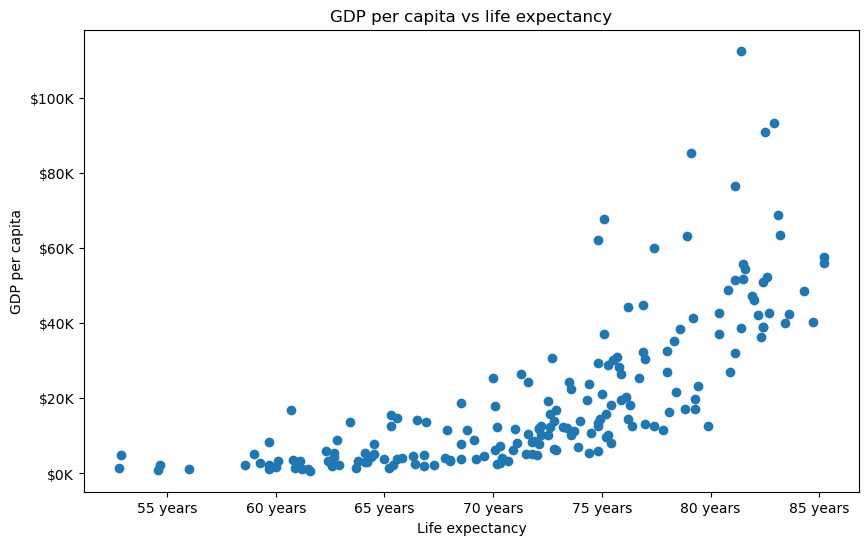

In [18]:
# Defining the axis
xValues = merged['Life expectancy']
yValues = merged['GDP per capita']

# Plots the values in a scatter plot
plt.scatter(xValues, yValues)

# Formating the figure to make it nicer
plt.title('GDP per capita vs life expectancy')

plt.xlabel('Life expectancy')
plt.ylabel('GDP per capita')

# This format function will make the extremely large numbers more readable by displaying them in more appropriate units
def num_formatter(value, indx):
    if value >= 1_000_000_000:
        formatter = '${:1.0f}B'.format(value*0.000_000_001)
    elif value >= 1_000_000:
        formatter = '${:1.0f}M'.format(value*0.000_001)
    else:
        formatter = '${:1.0f}K'.format(value*0.001)
    return formatter

plt.gca().xaxis.set_major_formatter('{x:1.0f} years')
plt.gca().yaxis.set_major_formatter(num_formatter)

plt.gcf().set_size_inches(10,6)

plt.show()

 We see a very clear trend with wealthier countries having a higher life expectancy.

## Question B

Which countries have a life expectancy higher than one standard deviation above the mean?

In [19]:
# Get the mean of life expectancy
le_mean = merged['Life expectancy'].mean()
le_mean

71.93809523809524

In [20]:
# Get the standard deviation of 2020 life expectancy
le_std = merged['Life expectancy'].std()
le_std

7.472220081630909

In [21]:
# Calculate "one standard deviation above the mean".
std_over_mean = le_mean + le_std
std_over_mean

79.41031531972615

In [22]:
# Get a dataframe with life expectancy one standard deviation above the mean
std_over_mean_df = (merged[merged['Life expectancy'] > std_over_mean] [['Entity', 'Life expectancy']]
                    .sort_values('Life expectancy', ascending = False))
std_over_mean_df

,Entity,Life expectancy
74,Hong Kong,85.2
100,Macao,85.2
85,Japan,84.7
7,Australia,84.3
160,South Korea,83.6
106,Malta,83.4
127,Norway,83.2
166,Switzerland,83.1
154,Singapore,82.9
122,New Zealand,82.7


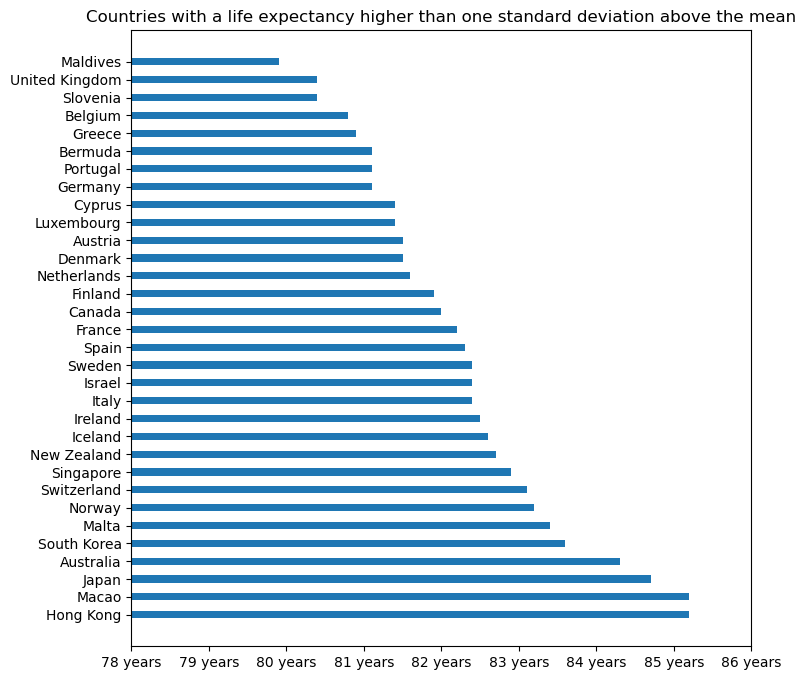

In [23]:
# Clear the previous plot
plt.clf()

# Defining the axis
xValues = std_over_mean_df['Life expectancy']
yValues = std_over_mean_df['Entity']

# Plots the values in a horizontal bar graph
plt.barh(yValues, xValues, height=0.4)

# Formating the figure to make it nicer
plt.title("Countries with a life expectancy higher than one standard deviation above the mean")
plt.gca().xaxis.set_major_formatter('{x:1.0f} years')
plt.gcf().set_size_inches(8, 8)
plt.xlim([78,86])

plt.show()

## Question C

Which countries have high life expectancy but have low GDP? (note: GDP and not GDP per capita in question c and d) 
Motivate how you have chosen to define “high” and “low”.

We will simply define high life expectancy as being life expectancy above the mean and low GDP as being GDP below the mean.

In [24]:
# Get the GDP mean
gdp_mean = gdp_clean['GDP'].mean()

gdp_mean

416179121628.6598

In [25]:
# Get the Life expectancy mean
le_mean = le_clean['Life expectancy'].mean()

le_mean

72.83531914893618

In [26]:
high_le_low_gdp = (merged[(merged['Life expectancy'] > le_mean) & (merged['GDP'] < gdp_mean)]
                   .sort_values('Life expectancy', ascending = True))
high_le_low_gdp = high_le_low_gdp[['Entity', 'GDP', 'Life expectancy']]

print(high_le_low_gdp.to_markdown())

|     | Entity                   |          GDP |   Life expectancy |
|----:|:-------------------------|-------------:|------------------:|
|  50 | Dominican Republic       |  83287064576 |              72.9 |
|  16 | Belize                   |   1577955712 |              72.9 |
| 134 | Paraguay                 |  40446808064 |              73.2 |
| 145 | Saint Lucia              |   1588638592 |              73.4 |
| 152 | Seychelles               |   1386262400 |              73.5 |
|  25 | Bulgaria                 |  54923718656 |              73.6 |
|  49 | Dominica                 |    473932832 |              73.6 |
| 135 | Peru                     | 190979129344 |              73.7 |
| 115 | Morocco                  | 105726173184 |              73.9 |
| 109 | Mauritius                |  11465334784 |              74.3 |
| 131 | Palestine                |  14015399936 |              74.4 |
| 173 | Trinidad and Tobago      |  20813758464 |              74.4 |
|   2 | Algeria     

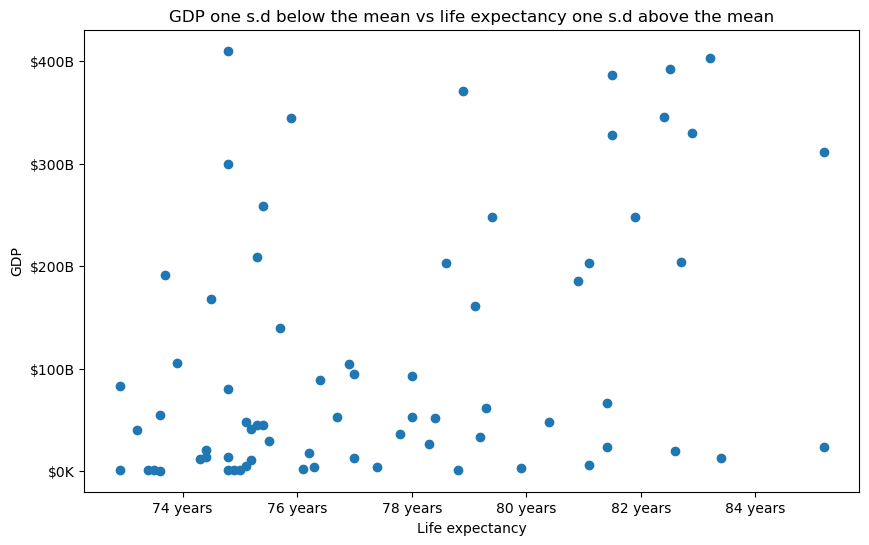

In [27]:
# Clear the previous plot
plt.clf()

# Defining the axis
xValues = high_le_low_gdp['Life expectancy']
yValues = high_le_low_gdp['GDP']

# Plots the values in a scatter plot
plt.scatter(xValues, yValues)

# Formating the figure to make it nicer
plt.title('GDP one s.d below the mean vs life expectancy one s.d above the mean')

plt.xlabel('Life expectancy')
plt.ylabel('GDP')

plt.gca().xaxis.set_major_formatter('{x:1.0f} years')
plt.gca().yaxis.set_major_formatter(num_formatter)

plt.gcf().set_size_inches(10,6)

plt.show()

We see that the scatter plot data is fairly spread out. It is however slightly denser in the lower GDP and life expectancy area.

## Question D

Does every strong economy (normally indicated by GDP) have high life expectancy?

Since we defined high and low as being above or below the mean, we will get the answer for this question by finding countries with GDP above the mean and life expectancy below the mean.

In [28]:
# Get countries with GDP above the mean and life expectancy below the mean.
high_gdp_low_le = (merged[(merged['Life expectancy'] < le_mean) & (merged['GDP'] > gdp_mean)]
                    .sort_values('Life expectancy', ascending = False))
high_gdp_low_le = high_gdp_low_le[['Entity', 'GDP', 'Life expectancy']]

high_gdp_low_le

,Entity,GDP,Life expectancy
142,Russia,1416124432384,71.3
110,Mexico,1148749217792,70.1
77,India,2500132077568,70.1
78,Indonesia,1027602841600,68.8
125,Nigeria,493917962240,52.9


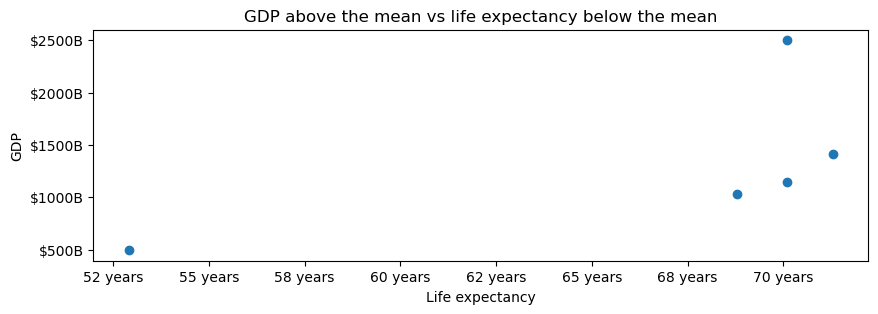

In [29]:
# Clear the previous plot
plt.clf()

# Defining the axis
xValues = high_gdp_low_le['Life expectancy']
yValues = high_gdp_low_le['GDP']

# Plots the values in a scatter plot
plt.scatter(xValues, yValues)

# Formating the figure to make it nicer
plt.title('GDP above the mean vs life expectancy below the mean')

plt.xlabel('Life expectancy')
plt.ylabel('GDP')

plt.gca().xaxis.set_major_formatter('{x:1.0f} years')
plt.gca().yaxis.set_major_formatter(num_formatter)

plt.gcf().set_size_inches(10,3)

plt.show()

We see that Russia, Mexico, India, Indonesia and Nigeria have high GDP yet have low life expectancy.

# Question E

Related to question d, what would happen if you use GDP per capita as an indicator of a strong economy? Explain the results you obtained, and discuss any insights you get from comparing the results of d and e.

In [30]:
# Get the GDP pc mean
gdp_pc_mean = gdp_pc_clean['GDP per capita'].mean()

gdp_pc_mean

20151.927192486153

In [31]:
# Get countries with GDP pc above the mean and life expectancy below the mean.
high_gdp_pc_low_le = (merged[(merged['Life expectancy'] < le_mean) & (merged['GDP per capita'] > gdp_pc_mean)]
                      .sort_values('Life expectancy', ascending = False))
high_gdp_pc_low_le = high_gdp_pc_low_le[['Entity', 'GDP per capita', 'Life expectancy']]

high_gdp_pc_low_le

,Entity,GDP per capita,Life expectancy
10,Bahamas,30846.583984,72.7
144,Saint Kitts and Nevis,24319.363281,71.6
142,Russia,26456.388672,71.3
87,Kazakhstan,25363.166016,70.0


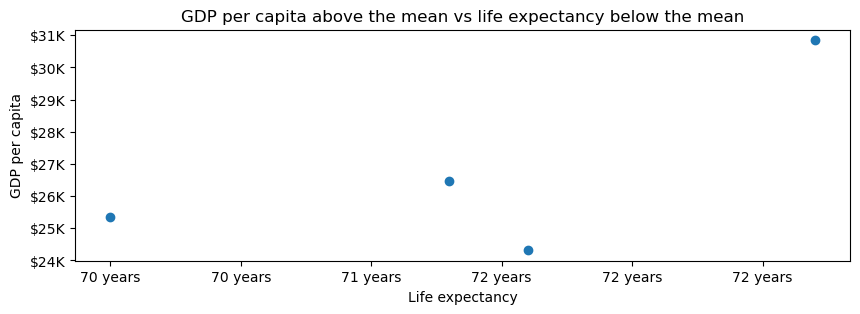

In [32]:
# Clear the previous plot
plt.clf()

# Defining the axis
xValues = high_gdp_pc_low_le['Life expectancy']
yValues = high_gdp_pc_low_le['GDP per capita']

# Plots the values in a scatter plot
plt.scatter(xValues, yValues)

# Formating the figure to make it nicer
plt.title('GDP per capita above the mean vs life expectancy below the mean')

plt.xlabel('Life expectancy')
plt.ylabel('GDP per capita')

plt.gca().xaxis.set_major_formatter('{x:1.0f} years')
plt.gca().yaxis.set_major_formatter(num_formatter)

plt.gcf().set_size_inches(10,3)

plt.show()

We see that Bahamas, Saint Kitts and Nevis, Russia and Kazakhstan have high GDP pc yet have low life expectancy.

Since we see Mexico, India, Indonesia and Nigeria in D but not E, we learn that although these countries have a high GDP, they actually have a low GDP pc which makes the low life expectany more understandable.

On the flip side, since we see Bahamas, Saint Kitts and Nevis and Kazakhstan in E but not D, we learn that although these countries have a high GDP pc, they have a low GDP. This point in the direction that there are other issues these countries have that negetevely affect life expectancy such that even though in question A we see a trend with high GDP pc countries having higher life expectancy, these issues are so big that these countries still have a low life expectancy.

And lastly we have Russia which we see in both D and E. This is very interesting since this means that despite having both a high GDP and GDP per capita, they still have a low life expectancy.

However still, looking at the scatter plots we can actually still see a slight trend with wealthier countries having a higher life expectancy.

## References

[1] Our World in Data, Economic Growth, GDP per capita 2020, https://ourworldindata.org/economic-growth#different-data-sets-on-growth-in-the-last-decades

[2] Our World in Data, Economic Growth, GDP 2020, https://ourworldindata.org/economic-growth#total-output-of-economies

[3] Our World in Data, Life Expectancy, Life Expectancy 2021, https://ourworldindata.org/life-expectancy#differences-in-life-expectancy-across-the-world